# LSTM Time Series Forecasting

###

Enter your time series data as a Python list (Example: [100, 150, 170, ...]):
Note: you must enter 7 or more entries 
[10, 20, 30, 40, 50,60, 70, 80, 90, 100,110, 120, 130, 140, 150,160, 170, 180, 190, 200,210, 220, 230, 240, 250,260, 270, 280, 290, 300,310, 320, 330, 340, 350,360, 370, 380, 390, 400,410, 420, 430, 440, 450,460, 470, 480, 490, 500]
Epoch 1/50


C:\Users\dell\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 0s/step - loss: 0.2384
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.2098
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1977
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1760
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1625
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1361
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1209 
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1120
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0950 
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0821
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0701
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0566
Epoch 13/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0451  
Epoch 14/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0367
Epoch 15/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0254
Epoch 16/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/

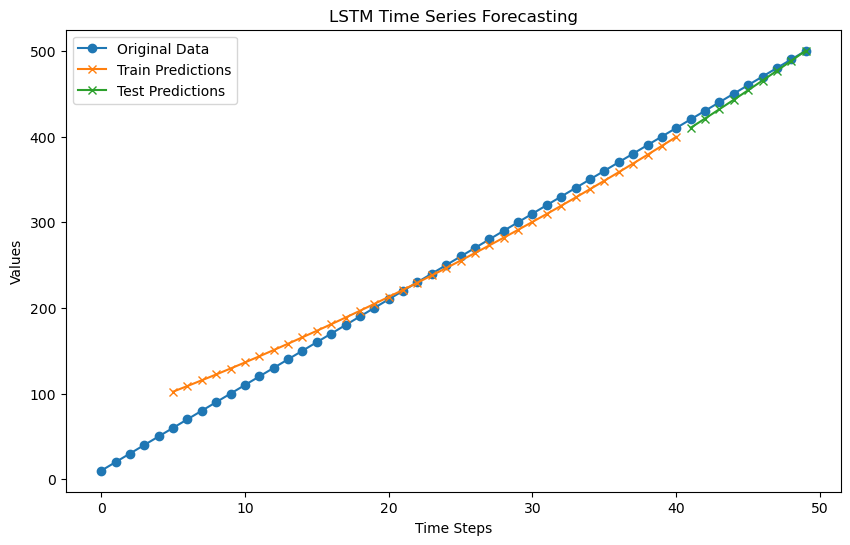

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler


def prepare_data(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)

def get_user_input():
    try:
        data = input("Enter your time series data as a Python list (Example: [100, 150, 170, ...]):\nNote: you must enter 7 or more entries \n")
        data = eval(data)
        if not isinstance(data, list) or not all(isinstance(i, (int, float)) for i in data):
            raise ValueError("Input must be a list of numbers.")
        return np.array(data).reshape(-1, 1)
    except Exception as e:
        print(f"Invalid input: {e}")
        return None

data = get_user_input()
if data is None:
    print("Error in input. Exiting.")
    exit()

scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

sequence_length = 5  # Window size
X, y = prepare_data(data_scaled, sequence_length)
X = X.reshape((X.shape[0], X.shape[1], 1))  # Reshape for LSTM input

# training and testing
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

#LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(sequence_length, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# model
model.fit(X_train, y_train, epochs=50, verbose=1)

train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)
y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

plt.figure(figsize=(10, 6))
plt.plot(range(len(data)), data, label="Original Data", marker='o')
plt.plot(range(sequence_length, sequence_length + len(train_predictions)), train_predictions, label="Train Predictions", marker='x')
plt.plot(range(len(data) - len(test_predictions), len(data)), test_predictions, label="Test Predictions", marker='x')
plt.xlabel("Time Steps")
plt.ylabel("Values")
plt.title("LSTM Time Series Forecasting")
plt.legend()
plt.show()